In [1]:
import numpy as np
import pandas as pd
import datetime

In [2]:
dataDfraw = pd.read_csv('./Data/Bakery Sales.csv', sep=',')

### Drop place and day of week

In [3]:
dataDfraw.drop(['place', 'day of week'], axis=1, inplace=True)

### Drop nan value in datetime and total

In [4]:
dataDf = dataDfraw[dataDfraw['datetime'].notna() & dataDfraw['total'].notna()]
dataDf.reset_index(drop=True, inplace=True)

### Astype Datetime format

In [5]:
dataDf['datetime'] = pd.to_datetime(dataDf['datetime'], format='%Y-%m-%d')
dataDf.head()

C:\Users\Overl\AppData\Local\Temp\ipykernel_9520\2413786646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataDf['datetime'] = pd.to_datetime(dataDf['datetime'], format='%Y-%m-%d')


,datetime,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35:00,23800.0,1.0,NaN,NaN,1.0,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,2019-07-11 16:10:00,15800.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2019-07-12 11:49:00,58000.0,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-13 13:19:00,14800.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,2019-07-13 13:22:00,15600.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Count Days of sales

In [6]:
print("First Date Sales: ", dataDf.datetime.min())
print("Last Date Sales: ", dataDf.datetime.max())
delta = dataDf.datetime.max() - dataDf.datetime.min()
print("Sales days Total: ", delta.days)

First Date Sales:  2019-07-11 15:35:00
Last Date Sales:  2020-05-02 14:45:00
Sales days Total:  295


## Fill nan with Zero

In [7]:
list_nan = []
for kolom in dataDf.columns:
    list_nan.append(dataDf[kolom].isna().sum())
nanPandas = {'Kolom':dataDf.columns, 'Nan Count':list_nan}
pd.DataFrame(nanPandas)

,Kolom,Nan Count
0,datetime,0
1,total,0
2,angbutter,447
3,plain bread,1563
4,jam,2200
5,americano,2008
6,croissant,1673
7,caffe latte,2227
8,tiramisu croissant,1641
9,cacao deep,2097


In [8]:
dataDf.fillna(0, inplace=True)
dataDf.head()

C:\Users\Overl\AppData\Local\Temp\ipykernel_9520\559097776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataDf.fillna(0, inplace=True)


,datetime,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35:00,23800.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2019-07-11 16:10:00,15800.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2019-07-12 11:49:00,58000.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-07-13 13:19:00,14800.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2019-07-13 13:22:00,15600.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
list_nan = []
for kolom in dataDf.columns:
    list_nan.append(dataDf[kolom].isna().sum())
nanPandas = {'Kolom':dataDf.columns, 'Nan Count':list_nan}
pd.DataFrame(nanPandas)

,Kolom,Nan Count
0,datetime,0
1,total,0
2,angbutter,0
3,plain bread,0
4,jam,0
5,americano,0
6,croissant,0
7,caffe latte,0
8,tiramisu croissant,0
9,cacao deep,0


## Change Types Bakery as integer

In [10]:
for kolom in dataDf.columns[2:]:
    dataDf[kolom] = dataDf[kolom].astype('int')
dataDf.dtypes

C:\Users\Overl\AppData\Local\Temp\ipykernel_9520\3416353464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataDf[kolom] = dataDf[kolom].astype('int')


datetime              datetime64[ns]
total                        float64
angbutter                      int32
plain bread                    int32
jam                            int32
americano                      int32
croissant                      int32
caffe latte                    int32
tiramisu croissant             int32
cacao deep                     int32
pain au chocolat               int32
almond croissant               int32
croque monsieur                int32
mad garlic                     int32
milk tea                       int32
gateau chocolat                int32
pandoro                        int32
cheese cake                    int32
lemon ade                      int32
orange pound                   int32
wiener                         int32
vanila latte                   int32
berry ade                      int32
tiramisu                       int32
merinque cookies               int32
dtype: object

In [11]:
dataDf.drop(['croque monsieur', 'mad garlic'], axis=1, inplace=True)
dataDf.head()

C:\Users\Overl\AppData\Local\Temp\ipykernel_9520\409664852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataDf.drop(['croque monsieur', 'mad garlic'], axis=1, inplace=True)


,datetime,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35:00,23800.0,1,0,0,1,0,0,3,0,...,0,0,0,0,0,0,1,0,0,0
1,2019-07-11 16:10:00,15800.0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,2019-07-12 11:49:00,58000.0,0,0,0,0,0,0,14,0,...,0,0,0,0,0,0,0,0,0,0
3,2019-07-13 13:19:00,14800.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2019-07-13 13:22:00,15600.0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Calculate Recency

In [12]:
now =  datetime.datetime(2020,5,3)

recencyList = []
for kolom in dataDf.columns[2:]:
    recency = now - dataDf[dataDf[kolom] != 0].datetime.max()
    days = recency.days
    print(kolom , ':', days)
    recencyList.append(days)

angbutter : 0
plain bread : 0
jam : 5
americano : 0
croissant : 0
caffe latte : 0
tiramisu croissant : 0
cacao deep : 0
pain au chocolat : 0
almond croissant : 1
milk tea : 3
gateau chocolat : 2
pandoro : 2
cheese cake : 0
lemon ade : 14
orange pound : 0
wiener : 1
vanila latte : 0
berry ade : 0
tiramisu : 264
merinque cookies : 1


## Calculate Frequency

In [13]:
frequencyList = []
for kolom in dataDf.columns[2:]:
    frequency = dataDf[kolom].sum()
    print(kolom , ':', frequency)
    frequencyList.append(frequency)

angbutter : 3229
plain bread : 1028
jam : 249
americano : 513
croissant : 1049
caffe latte : 214
tiramisu croissant : 945
cacao deep : 364
pain au chocolat : 726
almond croissant : 235
milk tea : 160
gateau chocolat : 210
pandoro : 394
cheese cake : 92
lemon ade : 38
orange pound : 566
wiener : 476
vanila latte : 241
berry ade : 55
tiramisu : 7
merinque cookies : 49


## Calculate Monetary

In [14]:
BakeryPriceDF = pd.read_csv('./Data/Bakery price.csv', sep=',')

In [15]:
price = BakeryPriceDF[BakeryPriceDF['Name'] != 'delivery fee']
dict_price = {}
for name, harga in zip(price['Name'].to_list(), price['price'].to_list()):
    if (name == 'ice coffe'):
        dict_price['americano'] = int(harga)
        continue
    elif(name == 'ice coffe latter'):
        dict_price['caffe latte'] = int(harga)
        continue
    elif(name == 'ice milk tea'):
        dict_price['milk tea'] = int(harga)
        continue
    elif(name == 'valina latte'):
        dict_price['vanila latte'] = int(harga)
        continue
    dict_price[name] = int(harga)

In [16]:
monetaryList = []
for kolom in dataDf.columns[2:]:
    monetary = dataDf[kolom].sum() * dict_price[kolom]
    print(kolom , ':', monetary)
    monetaryList.append(monetary)

angbutter : 15499200
plain bread : 3598000
jam : 373500
americano : 2052000
croissant : 3671500
caffe latte : 963000
tiramisu croissant : 4536000
cacao deep : 1456000
pain au chocolat : 2541000
almond croissant : 940000
milk tea : 720000
gateau chocolat : 840000
pandoro : 1773000
cheese cake : 460000
lemon ade : 171000
orange pound : 2547000
wiener : 1190000
vanila latte : 1084500
berry ade : 247500
tiramisu : 31500
merinque cookies : 196000


## Make RFM Dataframes

In [17]:
ProductList = dataDf.columns[2:]
RFM_dict = {
    'ProductName': ProductList,
    'Recency': recencyList,
    'Frequency': frequencyList,
    'Monetary': monetaryList
}
RFM_DF = pd.DataFrame(RFM_dict)
RFM_DF

,ProductName,Recency,Frequency,Monetary
0,angbutter,0,3229,15499200
1,plain bread,0,1028,3598000
2,jam,5,249,373500
3,americano,0,513,2052000
4,croissant,0,1049,3671500
5,caffe latte,0,214,963000
6,tiramisu croissant,0,945,4536000
7,cacao deep,0,364,1456000
8,pain au chocolat,0,726,2541000
9,almond croissant,1,235,940000


## Clustering

In [18]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Scaling Data

In [19]:
scaler = StandardScaler()
rfm_normalized = RFM_DF[['Recency', 'Frequency', 'Monetary']]
rfm_normalized = scaler.fit_transform(rfm_normalized)
rfm_normalized = pd.DataFrame(rfm_normalized)
rfm_normalized

,0,1,2
0,-0.249163,3.968669,4.130103
1,-0.249163,0.748745,0.451399
2,-0.159873,-0.390883,-0.545306
3,-0.249163,-0.004667,-0.026475
4,-0.249163,0.779467,0.474118
5,-0.249163,-0.442086,-0.363089
6,-0.249163,0.627321,0.741338
7,-0.249163,-0.222645,-0.210701
8,-0.249163,0.306938,0.124676
9,-0.231305,-0.411364,-0.370199


### Elbow K-means

In [20]:
ssd = []
for num_cluster in range(1, 10):
    kmeans = KMeans(n_clusters=num_cluster, max_iter=50, init='k-means++', n_init='auto')
    kmeans.fit(rfm_normalized)

    ssd.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow')

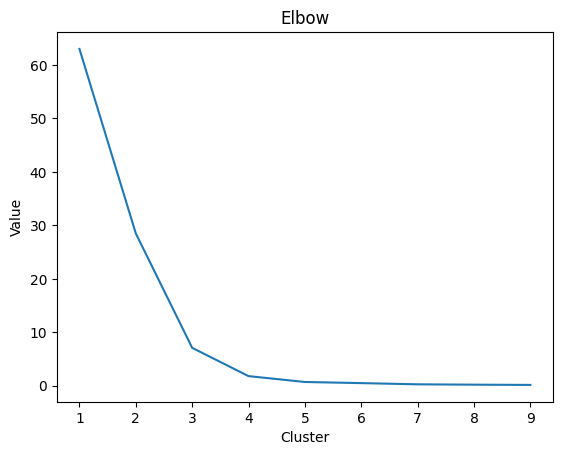

In [21]:
plt.figure()
plt.plot(range(1,10), ssd)
plt.xlabel("Cluster")
plt.ylabel("Value")
plt.title("Elbow")

## Train Again with 3 Cluster

In [22]:
kmeans = KMeans(n_clusters=3, max_iter=50, init='k-means++', n_init='auto')
kmeans.fit(rfm_normalized)

KMeans(max_iter=50, n_clusters=3, n_init='auto')

In [23]:
rfm_normalized.loc[:, 'ProductName'] = RFM_DF['ProductName']
rfm_normalized

,0,1,2,ProductName
0,-0.249163,3.968669,4.130103,angbutter
1,-0.249163,0.748745,0.451399,plain bread
2,-0.159873,-0.390883,-0.545306,jam
3,-0.249163,-0.004667,-0.026475,americano
4,-0.249163,0.779467,0.474118,croissant
5,-0.249163,-0.442086,-0.363089,caffe latte
6,-0.249163,0.627321,0.741338,tiramisu croissant
7,-0.249163,-0.222645,-0.210701,cacao deep
8,-0.249163,0.306938,0.124676,pain au chocolat
9,-0.231305,-0.411364,-0.370199,almond croissant


In [24]:
rfm_normalized['Cluster'] = kmeans.labels_
rfm_normalized

,0,1,2,ProductName,Cluster
0,-0.249163,3.968669,4.130103,angbutter,1
1,-0.249163,0.748745,0.451399,plain bread,0
2,-0.159873,-0.390883,-0.545306,jam,0
3,-0.249163,-0.004667,-0.026475,americano,0
4,-0.249163,0.779467,0.474118,croissant,0
5,-0.249163,-0.442086,-0.363089,caffe latte,0
6,-0.249163,0.627321,0.741338,tiramisu croissant,0
7,-0.249163,-0.222645,-0.210701,cacao deep,0
8,-0.249163,0.306938,0.124676,pain au chocolat,0
9,-0.231305,-0.411364,-0.370199,almond croissant,0


## Plot Recency vs Frequency

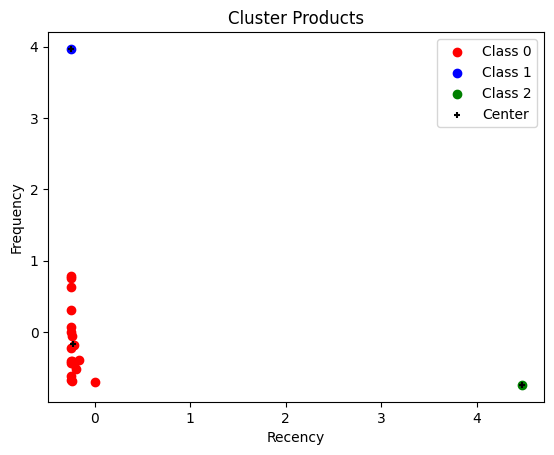

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
centers = kmeans.cluster_centers_
plt.scatter(rfm_normalized[rfm_normalized['Cluster']==0][0], rfm_normalized[rfm_normalized['Cluster']==0][1], c='red', label='Class 0')
plt.scatter(rfm_normalized[rfm_normalized['Cluster']==1][0], rfm_normalized[rfm_normalized['Cluster']==1][1], c='blue', label='Class 1')
plt.scatter(rfm_normalized[rfm_normalized['Cluster']==2][0], rfm_normalized[rfm_normalized['Cluster']==2][1], c='green', label='Class 2')
# plt.scatter(rfm_normalized[rfm_normalized['Cluster']==3][0], rfm_normalized[rfm_normalized['Cluster']==3][1], c='magenta', label='Class 4')
plt.scatter(centers[:,0], centers[:,1], s=20, c='black', label='Center', marker='+')
plt.title('Cluster Products')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Plot 3D

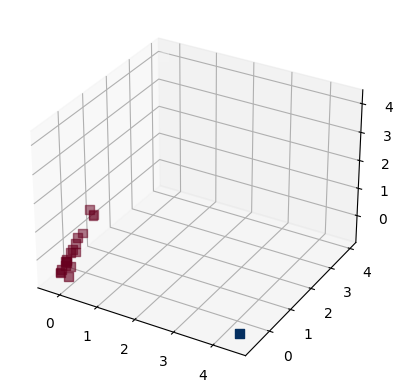

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(rfm_normalized[0])
y = np.array(rfm_normalized[1])
z = np.array(rfm_normalized[2])

ax.scatter(x,y,z, marker="s", c=rfm_normalized['Cluster'], s=40, cmap="RdBu")

## RFM Clustering Final

In [27]:
RFM_DF['Cluster'] = kmeans.labels_
RFM_DF

,ProductName,Recency,Frequency,Monetary,Cluster
0,angbutter,0,3229,15499200,1
1,plain bread,0,1028,3598000,0
2,jam,5,249,373500,0
3,americano,0,513,2052000,0
4,croissant,0,1049,3671500,0
5,caffe latte,0,214,963000,0
6,tiramisu croissant,0,945,4536000,0
7,cacao deep,0,364,1456000,0
8,pain au chocolat,0,726,2541000,0
9,almond croissant,1,235,940000,0
